# EfficientNet V2B0

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from tensorflow import keras
from keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Flatten, Dense, BatchNormalization, Dropout, GlobalAveragePooling2D

In [ ]:
train_dir = r"/content/PLANT_VILLAGE_SPLIT/train"
test_dir = r"/content/PLANT_VILLAGE_SPLIT/test"
val_dir = r"/content/PLANT_VILLAGE_SPLIT/val"

In [ ]:
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 16

In [ ]:
def preprocess_function(image):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    return image

In [ ]:
datagen = ImageDataGenerator(rescale=1.0/255,
                             preprocessing_function=preprocess_function)

In [ ]:
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 32572 images belonging to 38 classes.
Found 10849 images belonging to 38 classes.
Found 10885 images belonging to 38 classes.


In [ ]:
from tensorflow.keras.applications import EfficientNetV2B0

In [ ]:
base_model = EfficientNetV2B0(weights='imagenet' ,include_top=False , input_shape=(224, 224, 3), pooling='max' )

# for layer in base_model.layers[-1:]:
#     layer.trainable = True

model = Sequential()
model.add(base_model)

model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.6))
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(38, activation='softmax'))

for layer in base_model.layers:
    layer.trainable = False

In [ ]:
model.compile(tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.build(input_shape=(None, 224, 224, 3))
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetv2-b0 (Functional)       │ (None, 1280)                │       5,919,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_35               │ (None, 1280)                │           5,120 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 1024)                │       1,311,744 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_36               │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_37               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_38               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_39               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 38)                  │           2,470 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,918,646 (30.21 MB)

 Trainable params: 1,993,062 (7.60 MB)

 Non-trainable params: 5,925,584 (22.60 MB)

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.005, patience=5, restore_best_weights=True)

In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,
    callbacks=[early_stopping]
)

Epoch 1/50
2036/2036 ━━━━━━━━━━━━━━━━━━━━ 216s 91ms/step - accuracy: 0.0821 - loss: 3.5943 - val_accuracy: 0.1338 - val_loss: 3.3488
Epoch 2/50
2036/2036 ━━━━━━━━━━━━━━━━━━━━ 169s 83ms/step - accuracy: 0.1424 - loss: 3.3061 - val_accuracy: 0.1428 - val_loss: 3.3385
Epoch 3/50
2036/2036 ━━━━━━━━━━━━━━━━━━━━ 171s 84ms/step - accuracy: 0.1517 - loss: 3.2646 - val_accuracy: 0.1630 - val_loss: 3.2274
Epoch 4/50
2036/2036 ━━━━━━━━━━━━━━━━━━━━ 171s 84ms/step - accuracy: 0.1566 - loss: 3.2334 - val_accuracy: 0.1525 - val_loss: 3.2329
Epoch 5/50
2036/2036 ━━━━━━━━━━━━━━━━━━━━ 163s 80ms/step - accuracy: 0.1609 - loss: 3.2177 - val_accuracy: 0.1653 - val_loss: 3.1986
Epoch 6/50
2036/2036 ━━━━━━━━━━━━━━━━━━━━ 163s 80ms/step - accuracy: 0.1665 - loss: 3.2024 - val_accuracy: 0.1554 - val_loss: 3.2687
Epoch 7/50
2036/2036 ━━━━━━━━━━━━━━━━━━━━ 164s 80ms/step - accuracy: 0.1650 - loss: 3.2005 - val_accuracy: 0.1709 - val_loss: 3.1622
Epoch 8/50
2036/2036 ━━━━━━━━━━━━━━━━━━━━ 165s 81ms/step - accuracy: 

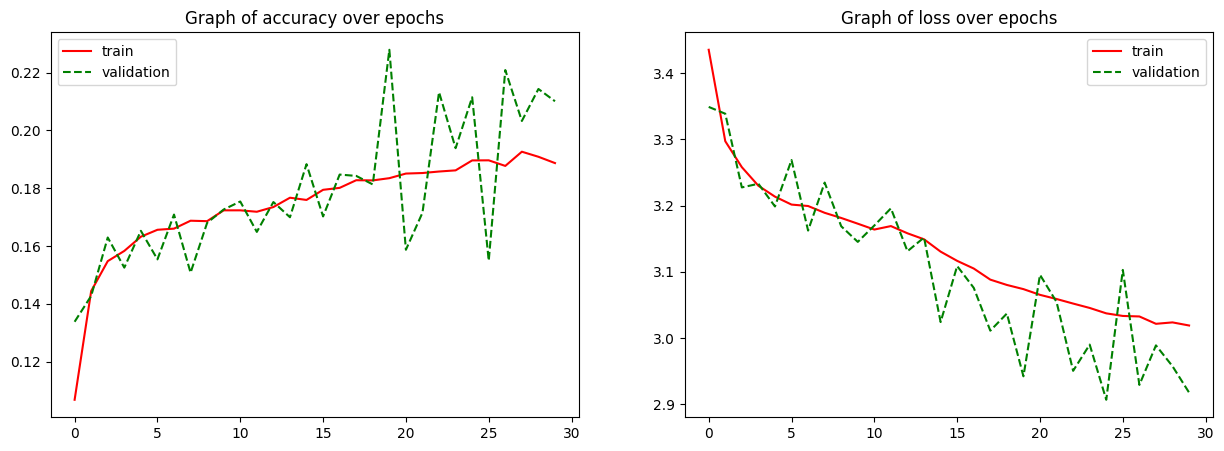

In [ ]:
def printplot(history):
        plt.figure(figsize=(15, 5))
        plt.subplot(1, 2, 1)
        plt.plot(history.history["accuracy"], color="red", label="train")
        plt.plot(history.history["val_accuracy"], color="green", label="validation", linestyle="dashed")
        plt.title("Graph of accuracy over epochs")
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(history.history["loss"], color="red", label="train")
        plt.plot(history.history["val_loss"], color="green", label="validation", linestyle="dashed")
        plt.title("Graph of loss over epochs")
        plt.legend()

printplot(history)

In [ ]:
model.save("EfficientNet.h5")

In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

681/681 ━━━━━━━━━━━━━━━━━━━━ 44s 65ms/step - accuracy: 0.2235 - loss: 2.8875
Test Accuracy: 21.33%
Test Loss: 2.9110
